# ADNIMERGE Table

## Data Import, Exploration, and Cleaning

In [1]:
# import the relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

# run cell magics
%matplotlib inline

In [2]:
# starting with object dtype to avoid errors in data consistency

adni_full = pd.read_csv('ADNIMERGE.csv', dtype='object')

In [3]:
adni_full.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,9/8/2005,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0,0,0,0,58:27.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,9/12/2005,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0,0,0,0,58:27.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,3/13/2006,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6,58:27.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,9/12/2006,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.9672,12,12,58:27.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,9/12/2007,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.99863,23.9344,24,24,58:27.0


In [4]:
# 14036 rows

adni_full.shape

(14036, 113)

In [5]:
# view each column to check out datatypes
# examine which columns are needed based on suggestions from the tadpole challenge

# commenting out to save space 
# adni_full.info

In [6]:
adni_full.DX.value_counts()

MCI         4410
CN          3310
Dementia    2230
Name: DX, dtype: int64

In [7]:
# research online for logical order of categories

DX = ['CN', 'MCI', 'Dementia']

In [8]:
adni_full.DX_bl.value_counts()

LMCI    4886
CN      4233
EMCI    2553
AD      1600
SMC      741
Name: DX_bl, dtype: int64

In [9]:
# research online for logical order of categories

DX_bl = ['CN', 'SMC', 'EMCI', 'LMCI', 'AD']

In [10]:
# initialize empty dataframe

adni = pd.DataFrame()

In [11]:
# set important datatypes

adni['RID'] = adni_full.RID.astype('int')
adni['EXAMDATE'] = pd.to_datetime(adni_full['EXAMDATE'])
adni['EXAMDATE_bl'] = pd.to_datetime(adni_full['EXAMDATE_bl'])
adni['Month'] = adni_full.Month.astype('int')
adni['PTGENDER'] = pd.Categorical(adni_full.PTGENDER)
adni['DX'] = pd.Categorical(adni_full.DX, ordered=True, categories=DX)
adni['DX_bl'] = pd.Categorical(adni_full.DX_bl, ordered=True, categories=DX_bl)
adni['PTEDUCAT'] = adni_full.PTEDUCAT.astype('int')

In [12]:
# can't convert to floats  ['ABETA', 'TAU', 'PTAU']
# create a list of values that should be float dtype for quick looping

floats = ['AGE', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 
          'Ventricles', 'WholeBrain', 'Entorhinal', 'MidTemp', 'FDG', 'AV45']

In [13]:
# use list to convert dtypes to float and move to new df

for i in floats:
    adni[i] = adni_full[i].astype('float')
    
    # age has no baseline '_bl' equivalent
    if i == 'AGE':
        continue
    
    # every other column has a '_bl' equivalent to convert as well
    else:    
        y = i + '_bl'
        adni[y] = adni_full[y].astype('float')

In [14]:
# examine the new dataframe

# comment out to save space
# adni.info

In [15]:
cols = list(adni.columns.values)

In [16]:
# generate NaN report

# add column names
nan_dict = {'column_name': list(cols)}

# initialze temp lists for looping
pct_list = []
sum_list = []

# generate a list of the pct null values
for col in cols:
    pct_list.append(adni[col].isnull().mean())
    sum_list.append(adni[col].isnull().sum())
    

# assign lists to the dictionary
nan_dict['pct_missing'] = pct_list
nan_dict['sum_missing'] = sum_list

# convert to dataframe
nan_report = pd.DataFrame(nan_dict)

In [17]:
nan_report

,column_name,pct_missing,sum_missing
0,RID,0.000000,0
1,EXAMDATE,0.000000,0
2,EXAMDATE_bl,0.000000,0
3,Month,0.000000,0
4,PTGENDER,0.000000,0
5,DX,0.291109,4086
6,DX_bl,0.001639,23
7,PTEDUCAT,0.000000,0
8,AGE,0.000142,2
9,CDRSB,0.283200,3975


In [18]:
# drop all columns missing too much data

adni.drop(labels=['FDG', 'FDG_bl', 'AV45', 'AV45_bl'], axis='columns', inplace=True)

In [19]:
adni.columns

Index(['RID', 'EXAMDATE', 'EXAMDATE_bl', 'Month', 'PTGENDER', 'DX', 'DX_bl',
       'PTEDUCAT', 'AGE', 'CDRSB', 'CDRSB_bl', 'ADAS11', 'ADAS11_bl', 'ADAS13',
       'ADAS13_bl', 'MMSE', 'MMSE_bl', 'RAVLT_immediate', 'RAVLT_immediate_bl',
       'Hippocampus', 'Hippocampus_bl', 'Ventricles', 'Ventricles_bl',
       'WholeBrain', 'WholeBrain_bl', 'Entorhinal', 'Entorhinal_bl', 'MidTemp',
       'MidTemp_bl'],
      dtype='object')

In [20]:
# include the examdate in the index

adni.set_index([adni.RID, adni.EXAMDATE], inplace=True)

In [21]:
adni.sort_index(inplace=True)

In [22]:
adni.drop(['RID', 'EXAMDATE'], axis='columns', inplace=True)

In [23]:
adni

EXAMDATE_bl  Month PTGENDER        DX DX_bl  PTEDUCAT   AGE  \
RID  EXAMDATE                                                                 
2    2005-09-08  2005-09-08      0     Male        CN    CN        16  74.3   
     2006-03-06  2005-09-08      6     Male        CN    CN        16  74.3   
     2008-08-27  2005-09-08     36     Male        CN    CN        16  74.3   
     2010-09-22  2005-09-08     60     Male        CN    CN        16  74.3   
     2011-03-04  2005-09-08     66     Male       NaN    CN        16  74.3   
     2011-09-19  2005-09-08     72     Male        CN    CN        16  74.3   
     2012-03-22  2005-09-08     78     Male       NaN    CN        16  74.3   
     2012-09-26  2005-09-08     84     Male       MCI    CN        16  74.3   
     2013-03-25  2005-09-08     90     Male       NaN    CN        16  74.3   
     2013-09-09  2005-09-08     96     Male        CN    CN        16  74.3   
     2014-03-17  2005-09-08    102     Male       NaN    CN        16  74.3   
     2014-10-13  2005-09-08    108     Male       NaN    CN        16  74.3   
     2015-09-22  2005-09-08    120     Male        CN    CN        16  74.3   
     2016-06-23  2005-09-08    132     Male       NaN    CN        16  74.3   
     2016-09-27  2005-09-08    132     Male       MCI    CN        16  74.3   
     2017-10-18  2005-09-08    144     Male       MCI    CN        16  74.3   
3    2005-09-12  2005-09-12      0     Male  Dementia    AD        18  81.3   
     2006-03-13  2005-09-12      6     Male  Dementia    AD        18  81.3   
     2006-09-12  2005-09-12     12     Male  Dementia    AD        18  81.3   
     2007-03-12  2005-09-12     18     Male       NaN    AD        18  81.3   
     2007-09-12  2005-09-12     24     Male  Dementia    AD        18  81.3   
4    2005-11-08  2005-11-08      0     Male       MCI  LMCI        10  67.5   
     2006-05-02  2005-11-08      6     Male       MCI  LMCI        10  67.5   
     2006-11-14  2005-11-08     12     Male       MCI  LMCI        10  67.5   
     2007-05-14  2005-11-08     18     Male       MCI  LMCI        10  67.5   
     2008-05-08  2005-11-08     30     Male       NaN  LMCI        10  67.5   
     2008-11-18  2005-11-08     36     Male       MCI  LMCI        10  67.5   
5    2005-09-07  2005-09-07      0     Male        CN    CN        16  73.7   
     2006-03-09  2005-09-07      6     Male        CN    CN        16  73.7   
     2006-09-05  2005-09-07     12     Male        CN    CN        16  73.7   
...                     ...    ...      ...       ...   ...       ...   ...   
6660 2019-03-13  2019-03-13      0   Female  Dementia    AD        16  84.9   
6661 2019-02-11  2019-02-11      0   Female  Dementia    AD        15  75.0   
6668 2019-02-06  2019-02-06      0   Female       MCI  LMCI        15  75.6   
6672 2019-03-05  2019-03-05      0     Male       MCI  EMCI        20  75.0   
6674 2019-05-10  2019-05-10      0     Male       NaN   NaN        20  70.0   
6677 2019-04-11  2019-04-11      0     Male       MCI  EMCI        16  78.6   
6679 2019-02-20  2019-02-20      0     Male       MCI  EMCI        14  75.4   
6681 2019-03-14  2019-03-14      0     Male       MCI  LMCI        16  64.8   
6682 2019-03-26  2019-03-26      0     Male       NaN   NaN        19  76.1   
6683 2019-02-26  2019-02-26      0     Male  Dementia    AD        15  66.7   
6686 2019-03-06  2019-03-06      0     Male       MCI  LMCI        16  79.2   
6687 2019-03-12  2019-03-12      0   Female  Dementia    AD        14  80.2   
6688 2019-03-07  2019-03-07      0     Male       MCI  LMCI        18  78.5   
6689 2019-04-03  2019-04-03      0     Male       NaN   NaN        14  75.1   
6690 2019-05-15  2019-05-15      0   Female  Dementia    AD        14  67.7   
6694 2019-05-08  2019-05-08      0     Male       NaN   NaN        12  69.7   
6695 2019-04-08  2019-04-08      0     Male       MCI  LMCI        18  66.3   
6696 2019-05-21  2019-05-21      0   Female       NaN   NaN       

In [24]:
adni.head(20)

EXAMDATE_bl  Month PTGENDER        DX DX_bl  PTEDUCAT   AGE  \
RID EXAMDATE                                                                 
2   2005-09-08  2005-09-08      0     Male        CN    CN        16  74.3   
    2006-03-06  2005-09-08      6     Male        CN    CN        16  74.3   
    2008-08-27  2005-09-08     36     Male        CN    CN        16  74.3   
    2010-09-22  2005-09-08     60     Male        CN    CN        16  74.3   
    2011-03-04  2005-09-08     66     Male       NaN    CN        16  74.3   
    2011-09-19  2005-09-08     72     Male        CN    CN        16  74.3   
    2012-03-22  2005-09-08     78     Male       NaN    CN        16  74.3   
    2012-09-26  2005-09-08     84     Male       MCI    CN        16  74.3   
    2013-03-25  2005-09-08     90     Male       NaN    CN        16  74.3   
    2013-09-09  2005-09-08     96     Male        CN    CN        16  74.3   
    2014-03-17  2005-09-08    102     Male       NaN    CN        16  74.3   
    2014-10-13  2005-09-08    108     Male       NaN    CN        16  74.3   
    2015-09-22  2005-09-08    120     Male        CN    CN        16  74.3   
    2016-06-23  2005-09-08    132     Male       NaN    CN        16  74.3   
    2016-09-27  2005-09-08    132     Male       MCI    CN        16  74.3   
    2017-10-18  2005-09-08    144     Male       MCI    CN        16  74.3   
3   2005-09-12  2005-09-12      0     Male  Dementia    AD        18  81.3   
    2006-03-13  2005-09-12      6     Male  Dementia    AD        18  81.3   
    2006-09-12  2005-09-12     12     Male  Dementia    AD        18  81.3   
    2007-03-12  2005-09-12     18     Male       NaN    AD        18  81.3   

                CDRSB  CDRSB_bl  ADAS11  ...  Hippocampus  Hippocampus_bl  \
RID EXAMDATE                             ...                                
2   2005-09-08    0.0       0.0   10.67  ...       8336.0          8336.0   
    2006-03-06    0.0       0.0   10.67  ...          NaN          8336.0   
    2008-08-27    0.0       0.0   12.00  ...          NaN          8336.0   
    2010-09-22    0.0       0.0   14.00  ...          NaN          8336.0   
    2011-03-04    NaN       0.0     NaN  ...          NaN          8336.0   
    2011-09-19    0.0       0.0   12.00  ...          NaN          8336.0   
    2012-03-22    NaN       0.0     NaN  ...          NaN          8336.0   
    2012-09-26    1.0       0.0    9.00  ...          NaN          8336.0   
    2013-03-25    NaN       0.0     NaN  ...          NaN          8336.0   
    2013-09-09    0.5       0.0   10.00  ...          NaN          8336.0   
    2014-03-17    NaN       0.0     NaN  ...          NaN          8336.0   
    2014-10-13    0.0       0.0     NaN  ...          NaN          8336.0   
    2015-09-22    0.0       0.0   12.00  ...          NaN          8336.0   
    2016-06-23    NaN       0.0     NaN  ...          NaN          8336.0   
    2016-09-27    1.0       0.0   12.00  ...          NaN          8336.0   
    2017-10-18    2.5       0.0   19.67  ...          NaN          8336.0   
3   2005-09-12    4.5       4.5   22.00  ...       5319.0          5319.0   
    2006-03-13    6.0       4.5   19.00  ...       5446.0          5319.0   
    2006-09-12    3.5       4.5   24.00  ...       5157.0          5319.0   
    2007-03-12    NaN       4.5     NaN  ...          NaN          5319.0   

                Ventricles  Ventricles_bl  WholeBrain  WholeBrain_bl  \
RID EXAMDATE                                                           
2   2005-09-08    118233.0       118233.0   1229740.0      1229740.0   
    2006-03-06         NaN       118233.0         NaN      1229740.0   
    2008-08-27         NaN       118233.0         NaN      1229740.0   
    2010-09-22         NaN       118233.0         NaN      1229740.0   
    2011-03-04         NaN       118233.0         NaN      1229740.0   
    2011-09-19         NaN       118233.0         NaN      1229740.0   
    2012-03-22         NaN 

In [25]:
# check for missing diagnoses

adni.DX.isnull().mean()

0.2911085779424337

In [26]:
# check for missing diagnoses

adni.DX_bl.isnull().mean()

0.0016386434881732687

In [27]:
# drop all rows missing a diagnosis DX or baseline diagnosis

adni_dx = adni.dropna(subset=['DX', 'DX_bl'])

In [28]:
# verify the drop results

adni_dx.DX.isnull().sum()

0

In [29]:
# verify the drop results

adni_dx.DX_bl.isnull().sum()

0

In [30]:
# check the new df shape for number of rows

adni_dx.shape

(9950, 27)

In [31]:
# find the number of exams

num_exams = adni_dx.groupby('RID')['EXAMDATE_bl'].count()

In [32]:
# create a series that only includes patients with > 1 visit

multi_exams_RID = num_exams[num_exams > 1]

In [33]:
# filter adni dataframe to all data from patients with > 1 visit

multi_exams = adni_dx.loc[multi_exams_RID.index]

In [34]:
multi_exams.head()

EXAMDATE_bl  Month PTGENDER  DX DX_bl  PTEDUCAT   AGE  CDRSB  \
RID EXAMDATE                                                                  
2   2005-09-08  2005-09-08      0     Male  CN    CN        16  74.3    0.0   
    2006-03-06  2005-09-08      6     Male  CN    CN        16  74.3    0.0   
    2008-08-27  2005-09-08     36     Male  CN    CN        16  74.3    0.0   
    2010-09-22  2005-09-08     60     Male  CN    CN        16  74.3    0.0   
    2011-09-19  2005-09-08     72     Male  CN    CN        16  74.3    0.0   

                CDRSB_bl  ADAS11  ...  Hippocampus  Hippocampus_bl  \
RID EXAMDATE                      ...                                
2   2005-09-08       0.0   10.67  ...       8336.0          8336.0   
    2006-03-06       0.0   10.67  ...          NaN          8336.0   
    2008-08-27       0.0   12.00  ...          NaN          8336.0   
    2010-09-22       0.0   14.00  ...          NaN          8336.0   
    2011-09-19       0.0   12.00  ...          NaN          8336.0   

                Ventricles  Ventricles_bl  WholeBrain  WholeBrain_bl  \
RID EXAMDATE                                                           
2   2005-09-08    118233.0       118233.0   1229740.0      1229740.0   
    2006-03-06         NaN       118233.0         NaN      1229740.0   
    2008-08-27         NaN       118233.0         NaN      1229740.0   
    2010-09-22         NaN       118233.0         NaN      1229740.0   
    2011-09-19         NaN       118233.0         NaN      1229740.0   

                Entorhinal  Entorhinal_bl  MidTemp  MidTemp_bl  
RID EXAMDATE                                                    
2   2005-09-08      4177.0         4177.0  27936.0     27936.0  
    2006-03-06         NaN         4177.0      NaN     27936.0  
    2008-08-27         NaN         4177.0      NaN     27936.0  
    2010-09-22         NaN         4177.0      NaN     27936.0  
    2011-09-19         NaN         4177.0      NaN     27936.0  

[5 rows x 27 columns]

In [35]:
multi_exams.shape

(9506, 27)

In [36]:
multi_exams.columns

Index(['EXAMDATE_bl', 'Month', 'PTGENDER', 'DX', 'DX_bl', 'PTEDUCAT', 'AGE',
       'CDRSB', 'CDRSB_bl', 'ADAS11', 'ADAS11_bl', 'ADAS13', 'ADAS13_bl',
       'MMSE', 'MMSE_bl', 'RAVLT_immediate', 'RAVLT_immediate_bl',
       'Hippocampus', 'Hippocampus_bl', 'Ventricles', 'Ventricles_bl',
       'WholeBrain', 'WholeBrain_bl', 'Entorhinal', 'Entorhinal_bl', 'MidTemp',
       'MidTemp_bl'],
      dtype='object')

In [37]:
# slice the clinical data only

clinical = multi_exams.loc[:, 'EXAMDATE_bl':'RAVLT_immediate_bl']

In [56]:
clinical.shape

(9506, 17)

In [39]:
# slice the scan data only

scans = multi_exams.loc[:, 'Hippocampus':'MidTemp_bl']

In [40]:
scans.head()

Hippocampus  Hippocampus_bl  Ventricles  Ventricles_bl  \
RID EXAMDATE                                                             
2   2005-09-08       8336.0          8336.0    118233.0       118233.0   
    2006-03-06          NaN          8336.0         NaN       118233.0   
    2008-08-27          NaN          8336.0         NaN       118233.0   
    2010-09-22          NaN          8336.0         NaN       118233.0   
    2011-09-19          NaN          8336.0         NaN       118233.0   

                WholeBrain  WholeBrain_bl  Entorhinal  Entorhinal_bl  MidTemp  \
RID EXAMDATE                                                                    
2   2005-09-08   1229740.0      1229740.0      4177.0         4177.0  27936.0   
    2006-03-06         NaN      1229740.0         NaN         4177.0      NaN   
    2008-08-27         NaN      1229740.0         NaN         4177.0      NaN   
    2010-09-22         NaN      1229740.0         NaN         4177.0      NaN   
    2011-09-19         NaN      1229740.0         NaN         4177.0      NaN   

                MidTemp_bl  
RID EXAMDATE                
2   2005-09-08     27936.0  
    2006-03-06     27936.0  
    2008-08-27     27936.0  
    2010-09-22     27936.0  
    2011-09-19     27936.0

In [41]:
# eliminate rows with no scan data

scans.dropna(how='all', inplace=True)

In [42]:
scans.shape

(9347, 10)

In [43]:
scans.head()

Hippocampus  Hippocampus_bl  Ventricles  Ventricles_bl  \
RID EXAMDATE                                                             
2   2005-09-08       8336.0          8336.0    118233.0       118233.0   
    2006-03-06          NaN          8336.0         NaN       118233.0   
    2008-08-27          NaN          8336.0         NaN       118233.0   
    2010-09-22          NaN          8336.0         NaN       118233.0   
    2011-09-19          NaN          8336.0         NaN       118233.0   

                WholeBrain  WholeBrain_bl  Entorhinal  Entorhinal_bl  MidTemp  \
RID EXAMDATE                                                                    
2   2005-09-08   1229740.0      1229740.0      4177.0         4177.0  27936.0   
    2006-03-06         NaN      1229740.0         NaN         4177.0      NaN   
    2008-08-27         NaN      1229740.0         NaN         4177.0      NaN   
    2010-09-22         NaN      1229740.0         NaN         4177.0      NaN   
    2011-09-19         NaN      1229740.0         NaN         4177.0      NaN   

                MidTemp_bl  
RID EXAMDATE                
2   2005-09-08     27936.0  
    2006-03-06     27936.0  
    2008-08-27     27936.0  
    2010-09-22     27936.0  
    2011-09-19     27936.0

In [ ]:
# examine the clinical data for outliers

In [44]:
clinical.columns

Index(['EXAMDATE_bl', 'Month', 'PTGENDER', 'DX', 'DX_bl', 'PTEDUCAT', 'AGE',
       'CDRSB', 'CDRSB_bl', 'ADAS11', 'ADAS11_bl', 'ADAS13', 'ADAS13_bl',
       'MMSE', 'MMSE_bl', 'RAVLT_immediate', 'RAVLT_immediate_bl'],
      dtype='object')

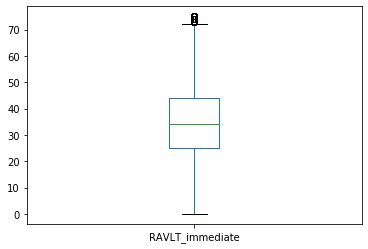

In [55]:
clinical.RAVLT_immediate.plot(kind='box')

In [ ]:
# how many patients have complete data
# how many have some missing

In [ ]:
# examine the scans